     -------------------------------------- 300.9/300.9 MB 1.1 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ---------------------------------------- 1.7/1.7 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 1.6 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     -------------------------------------- 442.0/442.0 kB 1.3 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     -------------------------------------- 130.2/130.2 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 413.4/413.4 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 938.6/938.6 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 852.8 kB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 1.4 MB/s eta 0:00:00
     ------------------------

In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D

In [16]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [17]:
X_test.shape

(10000, 28, 28)

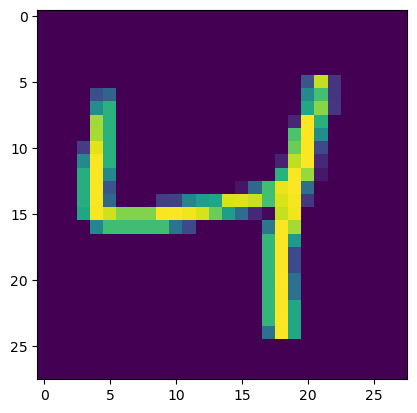

In [18]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [19]:
X_train = X_train/255
X_test = X_test/255

In [20]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [22]:
model = Sequential()
model.add(Conv2D(256, (3, 3), activation='relu', input_shape=(28, 28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [23]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 256)       2560      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 256)       590080    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 256)         0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)              

In [24]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [25]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25


1500/1500 [==============================] - 208s 137ms/step - loss: 0.1263 - accuracy: 0.9613 - val_loss: 0.0683 - val_accuracy: 0.9797
Epoch 2/25
1500/1500 [==============================] - 203s 135ms/step - loss: 0.0453 - accuracy: 0.9858 - val_loss: 0.0403 - val_accuracy: 0.9887
Epoch 3/25
1500/1500 [==============================] - 204s 136ms/step - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.0450 - val_accuracy: 0.9887
Epoch 4/25
1500/1500 [==============================] - 197s 131ms/step - loss: 0.0225 - accuracy: 0.9927 - val_loss: 0.0533 - val_accuracy: 0.9875
Epoch 5/25
1500/1500 [==============================] - 196s 131ms/step - loss: 0.0169 - accuracy: 0.9946 - val_loss: 0.0580 - val_accuracy: 0.9852
Epoch 6/25
1500/1500 [==============================] - 196s 131ms/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.0410 - val_accuracy: 0.9899
Epoch 7/25
1500/1500 [==============================] - 196s 130ms/step - loss: 0.0131 - accuracy: 0.9955 - va

In [26]:
y_prob = model.predict(X_test)


313/313 [==============================] - 10s 32ms/step


In [27]:
y_pred = y_prob.argmax(axis=1)

In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9939

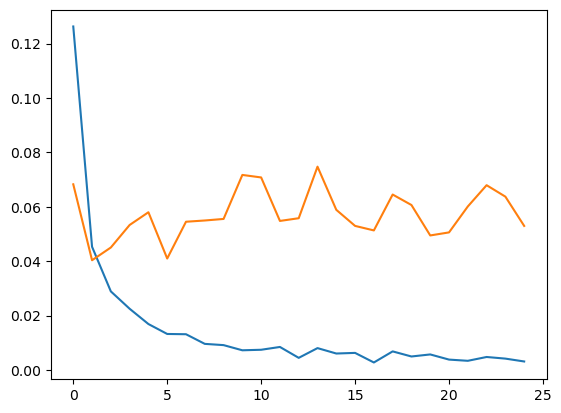

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

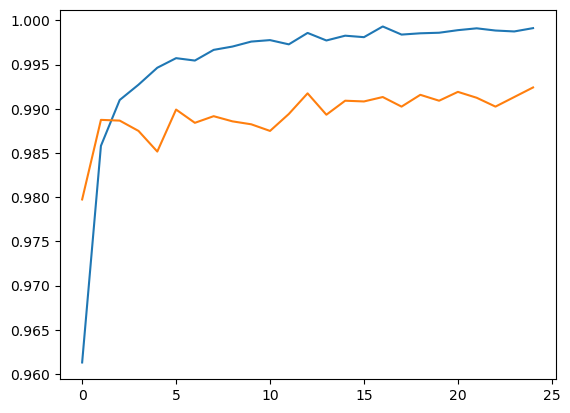

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

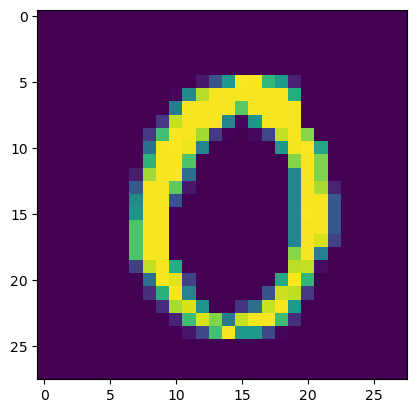

In [33]:
plt.imshow(X_test[13])

In [34]:
model.predict(X_test[13].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 53ms/step


array([0], dtype=int64)